In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('bus_trafic_clean.csv')
df.columns

Index(['Unnamed: 0', 'horodatage', 'identifiant_SAE_de_desserte',
       'identifiant_du_vehicule', 'numero_Timeo_de_l_arret',
       'etat_SAE_du_vehicule', 'numero_de_parc_du_vehicule', 'nom_de_la_ligne',
       'Heure_estimee_de_passage_a_L_arret', 'modele_du_vehicule',
       'identifiant_SAE_de_ligne', 'ecart_horaire_en_secondes', 'destination',
       'nom_de_l_arret', 'mne_de_l_arret', 'mnemo_de_la_ligne',
       'coordonnees_GPS_WG84', 'identifiant_SAE_de_l_arret',
       'cap_du_vehicule_en_degres', 'identifiant_SAE_du_parcours',
       'service_voiture', 'coordonnees_GPS_X', 'coordonnees_GPS_Y',
       'horodatage_maj', 'cordonnees_bus_geometrie', 'ecart_horodatage',
       'latitude', 'longitude', 'year', 'month', 'day', 'hours', 'minutes',
       'date', 'date_heure', 'jour_semaine', 'horodatage_round',
       'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY

In [4]:
df_pred = df[['ecart_horaire_en_secondes', 
            'etat_SAE_du_vehicule', 
            'nom_de_la_ligne',
            #'mne_de_l_arret',
            'latitude', 'longitude', 
            'Heure_estimee_de_passage_a_L_arret',
            #'year', 
            'month', 
            'day', 
            'hours', 
            #'minutes', 
            'jour_semaine', 
            'OPINION'
            ]]

df_pred = df_pred.astype({"Heure_estimee_de_passage_a_L_arret": "datetime64"})
#df_pred = df_pred.astype({"identifiant_SAE_de_ligne": "object"})       

#df_pred["year_passage_a_l_arret"] = df_pred["Heure_estimee_de_passage_a_L_arret"].dt.year
df_pred["month_passage_a_l_arret"] = df_pred["Heure_estimee_de_passage_a_L_arret"].dt.month
df_pred["day_passage_a_l_arret"] = df_pred["Heure_estimee_de_passage_a_L_arret"].dt.day
df_pred["hours_passage_a_l_arret"] = df_pred["Heure_estimee_de_passage_a_L_arret"].dt.hour
#df_pred["minutes_passage_a_l_arret"] = df_pred["Heure_estimee_de_passage_a_L_arret"].dt.minute
df_pred.drop(columns=['Heure_estimee_de_passage_a_L_arret'], inplace=True)

print(df_pred.shape)
df_pred.dtypes


(724202, 13)


ecart_horaire_en_secondes      int64
etat_SAE_du_vehicule          object
nom_de_la_ligne               object
latitude                     float64
longitude                    float64
month                          int64
day                            int64
hours                          int64
jour_semaine                  object
OPINION                       object
month_passage_a_l_arret        int64
day_passage_a_l_arret          int64
hours_passage_a_l_arret        int64
dtype: object

In [5]:
# outlier quantile ecart_horaire_en_secondes
q1 = df_pred['ecart_horaire_en_secondes'].quantile(0.25)
q3 = df_pred['ecart_horaire_en_secondes'].quantile(0.75)
iqr = q3 - q1

print(df_pred.shape)
df_pred = df_pred[(df_pred['ecart_horaire_en_secondes'] >= q1 - 1.5 * iqr) & (df_pred['ecart_horaire_en_secondes'] <= q3 + 1.5 * iqr)]
print(df_pred.shape)


(724202, 13)
(665044, 13)


In [6]:
df_pred = pd.get_dummies(df_pred)
df_pred.shape

(665044, 78)

In [81]:
# corr df_pred
#corr = df_pred.corr()
#corr.style.background_gradient(cmap='coolwarm')

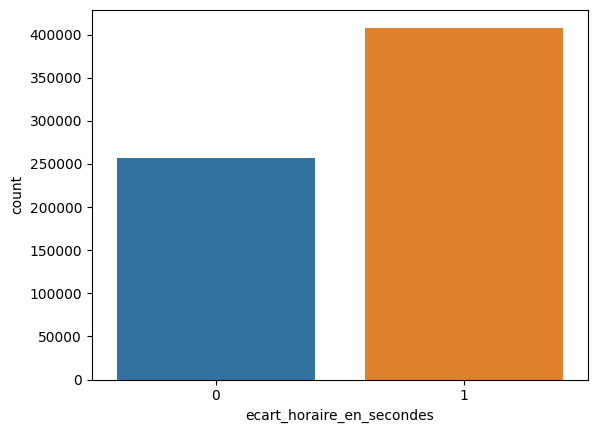

In [145]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import scale

X = df_pred.drop(columns=['ecart_horaire_en_secondes'])
X = scale(X)

y = df_pred['ecart_horaire_en_secondes'].apply(lambda x: 1 if x > 0 else 0)


# plot y distribution
sns.countplot(x=y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [146]:
# arbre 
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7563397965551203
Confusion Matrix:
[[35733 15669]
 [16740 64867]]


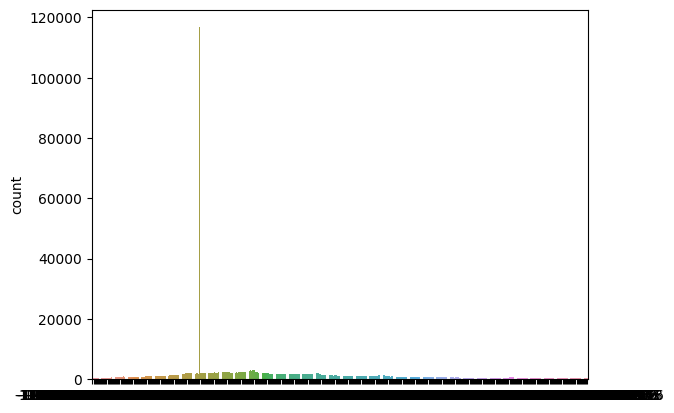

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import scale

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df_pred.drop(columns=['ecart_horaire_en_secondes'])
X = scale(X)

y = df_pred['ecart_horaire_en_secondes']
y = scale(y)


# plot y distribution
sns.countplot(x=y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
lr= LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), mean_absolute_percentage_error(y_test, y_pred)


(0.07816003168028729,
 0.7253222088333363,
 0.9600419906454731,
 0.9188084014039367)

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


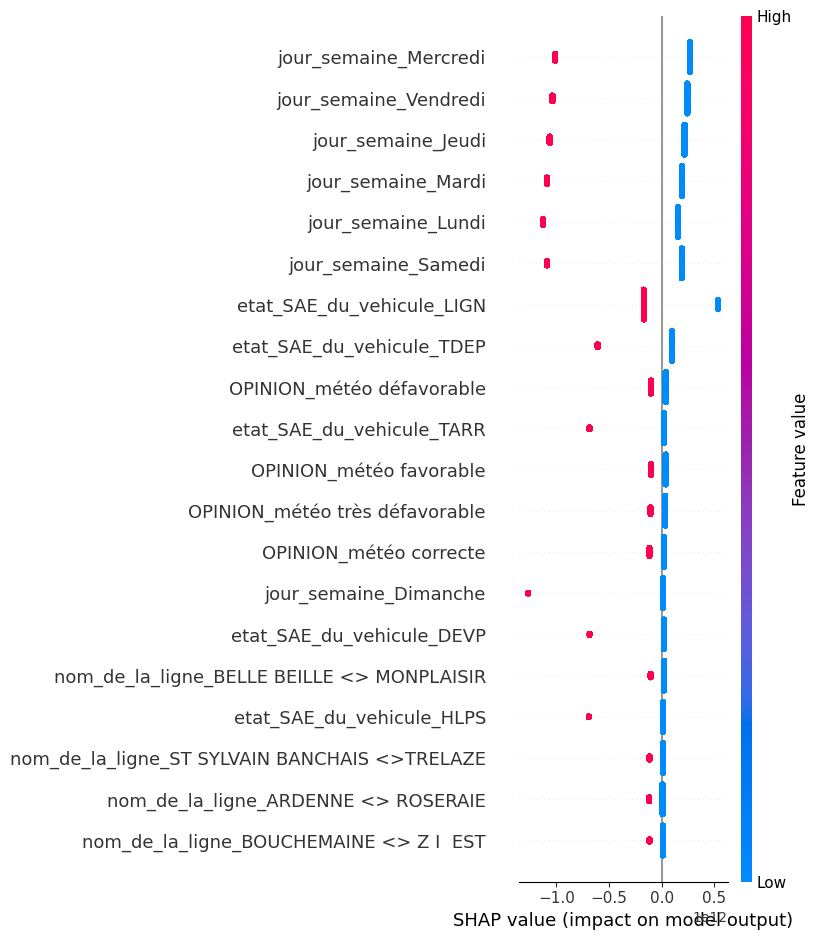

In [134]:
# shap for lr with feature names
import shap
shap.initjs()
explainer = shap.LinearExplainer(lr, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=df_pred.drop(columns=['ecart_horaire_en_secondes']).columns)

In [149]:
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [150]:
print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))

R2:  -0.3650907402846466
MSE:  1.3648547777180335
MAE:  0.7450084856557945
MAPE:  1.554696984517391


In [8]:
# decision tree regressor
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [11]:
print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))

R2:  0.26470017549923586
MSE:  0.7351727243537195
MAE:  0.5975310740144367
MAPE:  0.9725817202783048


In [12]:
importances = list(clf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df_pred.drop(columns=['ecart_horaire_en_secondes']).columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: latitude             Importance: 0.23
Variable: longitude            Importance: 0.23
Variable: hours                Importance: 0.08
Variable: hours_passage_a_l_arret Importance: 0.08
Variable: day                  Importance: 0.05
Variable: day_passage_a_l_arret Importance: 0.05
Variable: etat_SAE_du_vehicule_LIGN Importance: 0.04
Variable: month                Importance: 0.02
Variable: month_passage_a_l_arret Importance: 0.02
Variable: etat_SAE_du_vehicule_DEVP Importance: 0.01
Variable: nom_de_la_ligne_BEAUCOUZE <> ST BARTHELEMY Importance: 0.01
Variable: nom_de_la_ligne_BELLE BEILLE <> MONPLAISIR Importance: 0.01
Variable: nom_de_la_ligne_BOUCHEMAINE <> Z I  EST Importance: 0.01
Variable: nom_de_la_ligne_CIRCULAIRE VERNEAU GARE EUROPE Importance: 0.01
Variable: nom_de_la_ligne_ST LEZIN SORGES <> SCHWEITZER Importance: 0.01
Variable: jour_semaine_Jeudi   Importance: 0.01
Variable: jour_semaine_Lundi   Importance: 0.01
Variable: jour_semaine_Mardi   Importance: 0.01
Varia

In [90]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor().fit(X_train, y_train)

y_pred = sgdr.predict(X_test)

print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))


R2:  -9.515213124530636e+20
MSE:  9.513568373713362e+20
MAE:  85727437.05358301
MAPE:  146806956.6602986
